# Webscraping with Selenium
***

## Goal:
***

I wanted to show my skills at webscraping information and getting into a useable format for analysis.

### Note:
***

books.toscrape.com is a site specifically for webscraping. I used this as to not violate any terms of service on another site.

In [47]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Create webdriver
driver = webdriver.Firefox()

In [21]:
site = "http://books.toscrape.com/"

In [22]:
# Get request from site
driver.get(site)

In [23]:
# Empty list for urls
urls = []

In [24]:
# Get product page urls from clickable image links
url_elements = driver.find_elements(By.XPATH, "//article/div/a[contains(@href, 'catalogue')]")

In [25]:
# Store hyperlink attributes in list
for url in url_elements:
    url = url.get_attribute('href')
    urls.append(url)

# Check
print(len(urls))

20


In [26]:
# Get information from each product page
# Store the attributes in their respective lists

titles = []
prices = []
availability = []

for url in urls:
    driver.get(url)

    title_element = driver.find_element(By.XPATH, "//article//div/h1")
    titles.append(title_element.text)

    price_element = driver.find_element(By.XPATH, "//article/table/tbody/tr[th[text()='Price (incl. tax)']]/td")
    prices.append(price_element.text)

    availability_element = driver.find_element(By.XPATH, "//article/table/tbody/tr[th[text()='Availability']]/td")
    availability.append(availability_element.text)

    time.sleep(np.random.uniform(2,4))

# Quit driver
driver.quit()

# Check that all lists are the same length
print(f"Titles: {len(titles)}\nPrices: {len(prices)}\nAvailability: {len(availability)}")

Titles: 20
Prices: 20
Availability: 20


In [43]:
# Store data in data frame
df = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Availability': availability
})

df.head()

,Title,Price,Availability
0,A Light in the Attic,£51.77,In stock (22 available)
1,Tipping the Velvet,£53.74,In stock (20 available)
2,Soumission,£50.10,In stock (20 available)
3,Sharp Objects,£47.82,In stock (20 available)
4,Sapiens: A Brief History of Humankind,£54.23,In stock (20 available)


In [44]:
# Clean the data and change types
df['Price'] = df['Price'].str[1:]
df['Price'] = pd.to_numeric(df['Price'])

df['Availability'] = df['Availability'].str.replace(r'[^\d]','',regex=True)
df['Availability'] = pd.to_numeric(df['Availability'])
df['Availability'] = df['Availability'].astype('uint8') # Saving memory

# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         20 non-null     object 
 1   Price         20 non-null     float64
 2   Availability  20 non-null     uint8  
dtypes: float64(1), object(1), uint8(1)
memory usage: 472.0+ bytes


In [46]:
df.head()

,Title,Price,Availability
0,A Light in the Attic,51.77,22
1,Tipping the Velvet,53.74,20
2,Soumission,50.10,20
3,Sharp Objects,47.82,20
4,Sapiens: A Brief History of Humankind,54.23,20


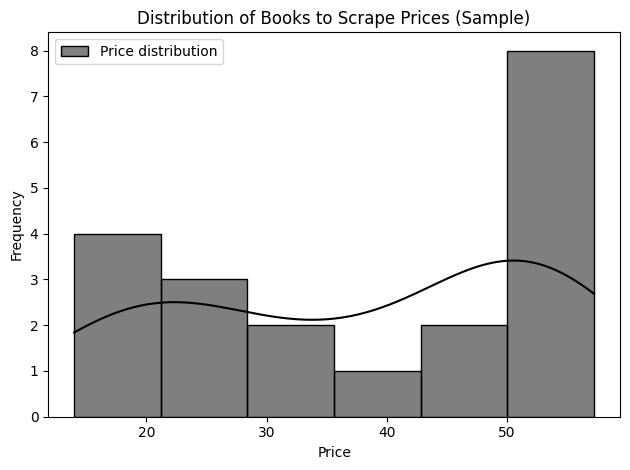

In [49]:
# Plot the distribution of prices
sns.histplot(data=df, x=df['Price'], kde=True, color='black', label='Price distribution')
plt.title("Distribution of Books to Scrape Prices (Sample)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# About Me:
***

I'm Chris Woodward. I am currently seeking opportunities in Florida for data analysis/data science. I am very open to remote work and willing to relocate to another area in Florida under the right circumstances. My salary goal is $70,000 (not including benefits).

You can see all my efforts for continuous learning on my LinkedIn.

[My LinkedIn Profile](https://www.linkedin.com/in/christopher-woodward-b24b43316/)